![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/68501079-0695df00-023c-11ea-841f-455dac84a089.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Complementary file types and IO tools

The pandas I/O API has a set of top level functions to let us work with a wide variety of file types.

In this lesson we'll show some file types pandas can work with besides the most known CSV, JSON and XLSX types.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import pandas as pd

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Pickling

When it comes to something like machine learning, after training your models, these models can't be saved to a .txt or .csv file, becouse it's an object with complex binary data.

Luckily, in programming, there are various terms for the process of saving binary data to a file that can be accessed later. In Python, this is called **pickling**. You may know it as serialization, or maybe even something else.

For our lucky, pandas handles _pickles_ in its IO module, and all pandas objects are equipped with the `to_pickle` and `read_pickle` methods.

In [2]:
df = pd.DataFrame([[1,2,3], [4,5,6]],
                  columns=['A','B','C'])

df

,A,B,C
0,1,2,3
1,4,5,6


The `to_pickle` method uses Python's `cPickle` module to save data structures to disk using the pickle format.

In [3]:
df.to_pickle('out.pkl')

In [4]:
!cat out.pkl

'cat' is not recognized as an internal or external command,
operable program or batch file.


The `read_pickle` method can be used to load any pickled pandas object (or any other pickled object) from file:

In [5]:
df = pd.read_pickle('out.pkl')

In [6]:
df

,A,B,C
0,1,2,3
1,4,5,6


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Clipboard content

A handy way to grab data is to use the `read_clipboard` method, which takes the contents of the clipboard buffer and passes them to the `read_table` method.

For instance, you can copy the following text to the clipboard (CTRL-C on many operating systems):

```
  A B C
x 1 4 p
y 2 5 q
z 3 6 r
```

And then import the data directly to a `DataFrame` by calling `read_clipboard` method.

In [7]:
df = pd.read_clipboard()

In [8]:
df

,https://www.fifaindex.com/players/top/fifa20_363/


The `to_clipboard` method can be used to write the contents of a `DataFrame` to the clipboard.

Following which you can paste the clipboard contents into other applications (CTRL-V on many operating systems).

In [9]:
df.to_clipboard()

In [10]:
pd.read_clipboard()

,https://www.fifaindex.com/players/top/fifa20_363/


We can see that we got the same content back, which we had earlier written to the clipboard.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## SAS files

The top-level function `read_sas()` can read (but not write) SAS xport (.XPT) and (since v0.18.0) SAS7BDAT (.sas7bdat) format files.

SAS files only contain two value types: ASCII text and floating point values (usually 8 bytes but sometimes truncated). For xport files, there is no automatic type conversion to integers, dates, or categoricals. For SAS7BDAT files, the format codes may allow date variables to be automatically converted to dates. By default the whole file is read and returned as a `DataFrame`.

We are going to load the `airline.sav7bdat` file into a pandas `DataFrame` using the `read_sas` method.

In [11]:
!cat airline.sas7bdat

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
df = pd.read_sas('airline.sas7bdat')

In [13]:
df.head()

,YEAR,Y,W,R,L,K
0,1948.0,1.214,0.243,0.1454,1.415,0.612
1,1949.0,1.354,0.260,0.2181,1.384,0.559
2,1950.0,1.569,0.278,0.3157,1.388,0.573
3,1951.0,1.948,0.297,0.3940,1.550,0.564
4,1952.0,2.265,0.310,0.3559,1.802,0.574


We can also load the same file from a given URL:

In [14]:
sas_url = 'http://www.principlesofeconometrics.com/sas/airline.sas7bdat'

In [15]:
df = pd.read_sas(sas_url)

In [16]:
df.head()

,YEAR,Y,W,R,L,K
0,1948.0,1.214,0.243,0.1454,1.415,0.612
1,1949.0,1.354,0.260,0.2181,1.384,0.559
2,1950.0,1.569,0.278,0.3157,1.388,0.573
3,1951.0,1.948,0.297,0.3940,1.550,0.564
4,1952.0,2.265,0.310,0.3559,1.802,0.574


Plot a variable:

<AxesSubplot:>

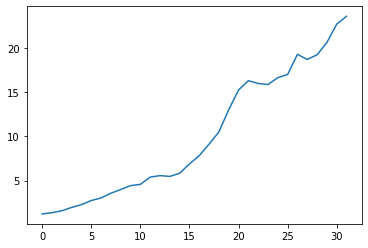

In [17]:
df.loc[:,'Y'].plot()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## STATA files

The top-level function `read_stata` will read a DTA file and return either a DataFrame or a **StataReader** that can be used to read the file incrementally.

We are going to load the `broiler.dta` file into a pandas `DataFrame` using the `read_stata` method.

In [18]:
!cat broiler.dta

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
df = pd.read_stata('broiler.dta')

In [20]:
df.head()

,year,q,y,pchick,pbeef,pcor,pf,cpi,qproda,pop,meatex,time
0,1950.0,14.3,7863.0,69.500000,31.200001,59.799999,NaN,24.100000,2628500.0,151.684006,NaN,41.0
1,1951.0,15.1,7953.0,72.900002,36.500000,72.099998,NaN,26.000000,2843000.0,154.287003,NaN,42.0
2,1952.0,15.3,8071.0,73.099998,36.200001,71.300003,NaN,26.500000,2851200.0,156.953995,NaN,43.0
3,1953.0,15.2,8319.0,71.300003,28.500000,62.700001,NaN,26.700001,2953900.0,159.565002,NaN,44.0
4,1954.0,15.8,8276.0,64.400002,27.400000,63.400002,NaN,26.900000,3099700.0,162.391006,NaN,45.0


We can also load the same file from a given URL:

In [21]:
stata_url = 'http://www.principlesofeconometrics.com/stata/broiler.dta'

In [22]:
df = pd.read_stata(stata_url)

In [23]:
df.head()

,year,q,y,pchick,pbeef,pcor,pf,cpi,qproda,pop,meatex,time
0,1950.0,14.3,7863.0,69.500000,31.200001,59.799999,NaN,24.100000,2628500.0,151.684006,NaN,41.0
1,1951.0,15.1,7953.0,72.900002,36.500000,72.099998,NaN,26.000000,2843000.0,154.287003,NaN,42.0
2,1952.0,15.3,8071.0,73.099998,36.200001,71.300003,NaN,26.500000,2851200.0,156.953995,NaN,43.0
3,1953.0,15.2,8319.0,71.300003,28.500000,62.700001,NaN,26.700001,2953900.0,159.565002,NaN,44.0
4,1954.0,15.8,8276.0,64.400002,27.400000,63.400002,NaN,26.900000,3099700.0,162.391006,NaN,45.0


Plot the Consumer Price Index (CPI):

<AxesSubplot:>

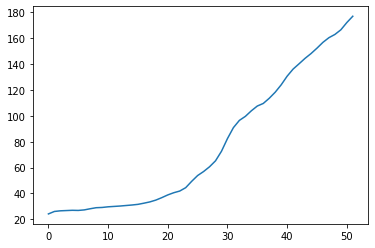

In [24]:
df.loc[:,'cpi'].plot()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Google BigQuery

Google BigQuery data can be loaded using pandas `read_gbq` method.

This method requires the `pandas-gbq` package and a _BigQuery project_ (you can create a new one from [here](https://console.cloud.google.com/bigquery)).

In [25]:
!pip install pandas_gbq

  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.1-py2.py3-none-any.whl (146 kB)


In [26]:
import pandas_gbq

In [27]:
sql = """
    SELECT name, SUM(number) as count
    FROM `bigquery-public-data.usa_names.usa_1910_current`
    GROUP BY name
    ORDER BY count DESC
    LIMIT 10
"""

pandas_gbq.read_gbq(sql,
                    project_id='MY_PROJECT_ID')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=j3dd2lygJxLsIOilF1HKNSjzkzx4jo&prompt=consent&access_type=offline


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)